In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("./marketing_AB.csv")
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


## Summary Statistics

In [3]:
# set Unnamed: 0 as index
df = df.set_index('Unnamed: 0')
df.index.name = None
df.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [4]:
# show types and count
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588101 entries, 0 to 588100
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user id        588101 non-null  int64 
 1   test group     588101 non-null  object
 2   converted      588101 non-null  bool  
 3   total ads      588101 non-null  int64 
 4   most ads day   588101 non-null  object
 5   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(3), object(2)
memory usage: 27.5+ MB


In [5]:
# show summary statisitics
df.describe()

,user id,total ads,most ads hour
count,5.881010e+05,588101.000000,588101.000000
mean,1.310692e+06,24.820876,14.469061
std,2.022260e+05,43.715181,4.834634
min,9.000000e+05,1.000000,0.000000
25%,1.143190e+06,4.000000,11.000000
50%,1.313725e+06,13.000000,14.000000
75%,1.484088e+06,27.000000,18.000000
max,1.654483e+06,2065.000000,23.000000


array([[<Axes: title={'center': 'total ads'}>,
        <Axes: title={'center': 'most ads hour'}>]], dtype=object)

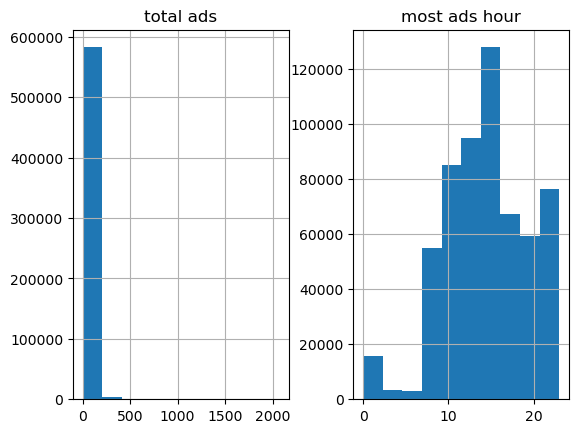

In [6]:
df[["total ads", "most ads hour"]].hist()

## Show Conversions by Bucket

In [7]:
# show number of conversions by test group
df_bar = df.groupby(["test group", "converted"]).size()
df_bar.head()

test group  converted
ad          False        550154
            True          14423
psa         False         23104
            True            420
dtype: int64

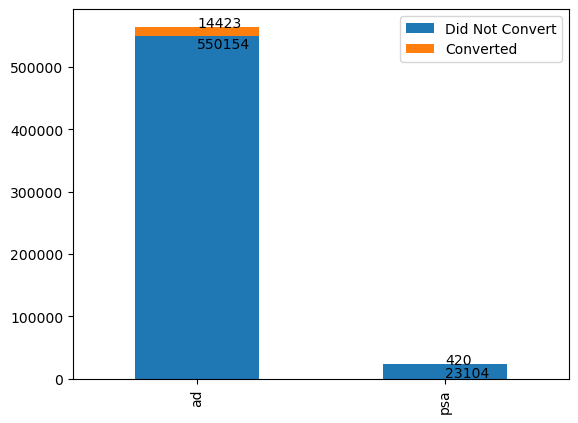

In [8]:
# plot experiement buckets
df_bar_pivot = pd.DataFrame({
    'Did Not Convert': [df_bar.iloc[0], df_bar.iloc[2]],
    'Converted': [df_bar.iloc[1], df_bar.iloc[3]]
}, index = ["ad", "psa"])
ax = df_bar_pivot.plot.bar(stacked=True)

y_offset = 20_000

# Did not convert Labels
ax.text(0,
       df_bar_pivot["Did Not Convert"]["ad"] - y_offset,
       df_bar_pivot["Did Not Convert"]["ad"])

ax.text(1,
       df_bar_pivot["Did Not Convert"]["psa"] - y_offset,
       df_bar_pivot["Did Not Convert"]["psa"])

# Converted Labels
ax.text(0,
       df_bar_pivot["Converted"]["ad"] + df_bar_pivot["Did Not Convert"]["ad"],
       df_bar_pivot["Converted"]["ad"])

ax.text(1,
       df_bar_pivot["Converted"]["psa"] + df_bar_pivot["Did Not Convert"]["psa"],
       df_bar_pivot["Converted"]["psa"])

plt.show()


## Run Significance 
Determine if there is a coorelation between being served an ad and conversion rate

In [9]:
# run t-test
t, p = ttest_ind(
    df[df["test group"] == "ad"]["converted"], 
    df[df["test group"] == "psa"]["converted"])
print(f"t-statistic = {t:.2f}")
print(f"p-value = {p:.15f}")

t-statistic = 7.37
p-value = 0.000000000000170


### Interpreting the T-Test
The t-statistic of 7.37 (larger than 2) indicates that there is a significantly large difference in the means of the buckets tested.

The p-value of 1.70e^-13 is well below the standard threshold of 0.05, indicating that the null hypothesis (that there is not difference between the two buckets) should be rejected and it is unlikely it occurred by chance.

In [10]:
# linear regression test
X = None


### Interpreting the Linear Regression